In [1]:
import pandas as pd
import numpy as np

In [33]:
# Read data from datasource
def read_csv_file(file_path):
    try:
        # Attempt to read the CSV file
        data = pd.read_csv(file_path)
        print("File read successfully!")
        return data
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: The file contains parsing errors.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Call read data func
file_path = '../data/HomeTask_ [1] User Information Labelled.csv'
labelled_user_info_df = read_csv_file(file_path)

if labelled_user_info_df is not None:
    print(labelled_user_info_df.shape)  # Display the first few rows if data was successfully loaded


File read successfully!
(500, 16)


In [3]:
# Drop duplicate rows from 'labelled_user_info_df'
labelled_user_info_df = labelled_user_info_df.drop_duplicates()
print(labelled_user_info_df.shape)

(455, 16)


In [4]:
labelled_user_info_df.head()

,user_id,session_id,country_of_residence,has_biometrics,phone_number_country_code,reason_to_use_app,occupation,kyc_state,gender,date_of_birth,document_issuing_country,locale,screening_state,is_adverse_media_minor,is_pep,user_current_state
0,00404b94-5c1b-47b0-9486-27ddda96ba52,5d711cff-d9eb-409d-9664-cf0a6819ce3a,NC,False,68,DAILY_PAYMENT_SERVICES,HEALTH,COMPLETED,F,1978-02-03,FR,fr_FR,COMPLETED,False,False,ACTIVE
1,005256f3-53d4-471c-8bbd-b0c5e16bf2f7,882dd5b7-e378-4947-89e0-900a79b3083f,FR,True,33,TRAVEL_ACCOUNT,SERVICE_AND_SALES,COMPLETED,M,2002-03-09,FR,fr_FR,COMPLETED,False,False,SUSPENDED
2,013604f7-775a-43ca-9cfd-6fa811a89487,89f1bf0a-3436-4ae5-9e13-ecbf915bda81,FR,True,33,CRYPTO_SERVICES,OTHER_SERVICES,COMPLETED,M,1995-11-17,FR,fr_FR,COMPLETED,False,False,ACTIVE
3,02c62912-a1d4-41cf-a8cd-681f8e97afc9,9f99203c-eb2a-4b23-92fe-6a87ea3c5124,FR,False,68,INTERNATIONAL_TRANSFERS,UNEMPLOYED,COMPLETED,F,1999-07-16,FR,fr_FR,COMPLETED,False,False,ACTIVE
4,03ac32c8-723e-474b-b537-4a82ddefe32e,174769fb-4eda-403d-9956-4d428eacba13,FR,False,33,INTERNATIONAL_TRANSFERS,UNEMPLOYED,COMPLETED,M,1980-07-29,FR,fr_FR,COMPLETED,False,False,SUSPENDED


In [5]:
labelled_user_info_df.user_id.nunique(), labelled_user_info_df.session_id.nunique()

(432, 432)

In [6]:
# Return data which has more than one same value for some specific features
def get_repeated_data(data, column):
    try:
        # Group by 'column' and filter groups having more than one entry
        repeated_data = data[data.duplicated(subset=[column], keep=False)]
        
        if repeated_data.empty:
            print("No duplicate data found.")
        else:
            print("Duplicate data found:")
            return repeated_data
    except KeyError:
        print(f"Error: The column '{column}' does not exist in the dataset.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [7]:
# Remove Missing data records
def remove_nan_rows(df, id_column):
    # Step 1: Remove rows with NaN values, but only if there are other rows with valid data for the same 'user_id'
    df_cleaned = df.dropna(subset=df.columns.difference([id_column]))
    
    # Step 2: Return the cleaned DataFrame
    return df_cleaned

# Call remove_nan_rows
cleaned_user_info_df = remove_nan_rows(labelled_user_info_df, 'user_id')
print(cleaned_user_info_df.shape)

(432, 16)


In [8]:
cleaned_user_info_df[cleaned_user_info_df.user_id == '29b4ae86-4605-42f2-bb23-eff7bc1f13cc'].head()

,user_id,session_id,country_of_residence,has_biometrics,phone_number_country_code,reason_to_use_app,occupation,kyc_state,gender,date_of_birth,document_issuing_country,locale,screening_state,is_adverse_media_minor,is_pep,user_current_state
71,29b4ae86-4605-42f2-bb23-eff7bc1f13cc,56657a8d-d82f-4215-9ed7-72380c5cf1a6,FR,True,33,CRYPTO_SERVICES,RETIRED,COMPLETED,M,1956-08-28,FR,fr_FR,COMPLETED,False,False,ACTIVE


In [11]:
# Get rows with duplicate 'user_id'
duplicate_rows = get_repeated_data(cleaned_user_info_df, 'user_id')
print(duplicate_rows.user_id)

Duplicate data found:
28     0f12e279-bfe4-4642-92d5-cf4407fc58dd
30     0f12e279-bfe4-4642-92d5-cf4407fc58dd
78     2e3e3b6d-720e-4af3-bc92-b34f7c2d772c
79     2e3e3b6d-720e-4af3-bc92-b34f7c2d772c
92     32ef57dc-b3e0-45d3-accf-2bee7a67bdf6
93     32ef57dc-b3e0-45d3-accf-2bee7a67bdf6
128    46852363-02ce-4b3b-8dee-4ca3a701f375
130    46852363-02ce-4b3b-8dee-4ca3a701f375
161    56e131f1-f869-40b7-99c4-8987de23e89c
162    56e131f1-f869-40b7-99c4-8987de23e89c
215    7105c83f-f17a-4438-bad0-3930654cc6c7
216    7105c83f-f17a-4438-bad0-3930654cc6c7
223    72f137f7-3d33-403c-aa22-dae9cf0f1875
224    72f137f7-3d33-403c-aa22-dae9cf0f1875
225    72f137f7-3d33-403c-aa22-dae9cf0f1875
235    788ac9c6-579e-4915-94e2-c93c62f3cd83
236    788ac9c6-579e-4915-94e2-c93c62f3cd83
277    8f3d861d-c654-4517-9d32-12bd4ea78e39
278    8f3d861d-c654-4517-9d32-12bd4ea78e39
283    8f3d861d-c654-4517-9d32-12bd4ea78e39
284    904fe986-ca2f-4dd9-aad4-cd636183eaf7
285    904fe986-ca2f-4dd9-aad4-cd636183eaf7
298    965

In [13]:
#29b4ae86-4605-42f2-bb23-eff7bc1f13cc -> kyc_state diff
#7105c83f-f17a-4438-bad0-3930654cc6c7 -> locale diff
#0f12e279-bfe4-4642-92d5-cf4407fc58dd -> has_biometrics diff
#12fb705c-c068-4033-a1d6-81c9f937f00c -> reason_to_use_app diff
#2e3e3b6d-720e-4af3-bc92-b34f7c2d772c -> user_current_state diff *****
#2f89a26f-09a5-42cd-b169-ec1c9b423f4a -> reason_to_use_app diff
#29b4ae86-4605-42f2-bb23-eff7bc1f13cc -> kyc_state diff
#29b4ae86-4605-42f2-bb23-eff7bc1f13cc -> kyc_state diff
cleaned_user_info_df[cleaned_user_info_df.user_id == '72f137f7-3d33-403c-aa22-dae9cf0f1875'].head()

,user_id,session_id,country_of_residence,has_biometrics,phone_number_country_code,reason_to_use_app,occupation,kyc_state,gender,date_of_birth,document_issuing_country,locale,screening_state,is_adverse_media_minor,is_pep,user_current_state
223,72f137f7-3d33-403c-aa22-dae9cf0f1875,9a3a00e4-1ddb-460c-bf78-1ac4ec91a5ff,FR,True,33,DAILY_PAYMENT_SERVICES,OTHER_SERVICES,COMPLETED,M,1993-09-17,FR,fr_AE,COMPLETED,False,False,SUSPENDED
224,72f137f7-3d33-403c-aa22-dae9cf0f1875,9a3a00e4-1ddb-460c-bf78-1ac4ec91a5ff,FR,True,33,DAILY_PAYMENT_SERVICES,OTHER_SERVICES,COMPLETED,M,1993-09-17,FR,fr_FR,COMPLETED,False,False,SUSPENDED
225,72f137f7-3d33-403c-aa22-dae9cf0f1875,9a3a00e4-1ddb-460c-bf78-1ac4ec91a5ff,FR,True,33,DAILY_PAYMENT_SERVICES,OTHER_SERVICES,COMPLETED,M,1993-09-17,FR,fr_AE,COMPLETED,False,False,ACTIVE


In [14]:
cleaned_user_info_df.country_of_residence.value_counts()

country_of_residence
FR    311
PF     80
NC     28
YT      5
RE      4
GP      3
MQ      1
Name: count, dtype: int64

In [24]:

cleaned_user_info_df.document_issuing_country.value_counts()

document_issuing_country
FR    420
IT      5
PT      4
ES      2
RO      1
Name: count, dtype: int64

In [16]:
cleaned_user_info_df.phone_number_country_code.value_counts()

phone_number_country_code
33    295
68    111
26     12
59      4
44      3
35      3
39      2
34      2
Name: count, dtype: int64

In [17]:
cleaned_user_info_df.locale.value_counts()

locale
fr_FR     344
fr_PF      33
fr_NC      14
en_FR       9
fr_US       5
en_GB       3
en_001      2
fr_MA       2
pt_BR       2
fr_BJ       2
en_ES       2
en_US       2
fr_AE       2
fr_ES       1
en_AU       1
en_AL       1
fr_GB       1
fr_PT       1
es_ES       1
ro_RO       1
fr_BE       1
fr_YT       1
fr_CA       1
Name: count, dtype: int64

In [18]:
cleaned_user_info_df.has_biometrics.value_counts()

has_biometrics
True     301
False    131
Name: count, dtype: int64

In [19]:
cleaned_user_info_df.reason_to_use_app.value_counts()

reason_to_use_app
DAILY_PAYMENT_SERVICES         202
CRYPTO_SERVICES                 95
NON_CUSTODIAL_CRYPTO_WALLET     46
INTERNATIONAL_TRANSFERS         45
TRAVEL_ACCOUNT                  44
Name: count, dtype: int64

In [20]:
cleaned_user_info_df.occupation.value_counts()

occupation
UNEMPLOYED                              77
OTHER_SERVICES                          75
SERVICE_AND_SALES                       62
STUDENTS                                45
RETIRED                                 26
ADMINISTRATION                          23
EDUCATION                               18
HEALTH                                  17
MINING_CONSTRUCTION_AND_TRANSPORT       15
MANAGEMENT                              15
FOOD_PREP_AND_CLEANING                  14
IT_AND_COMMUNICATION                    13
CRAFT_AND_RELATED_TRADES                12
AGRICULTURE_FISHERY_FORESTRY             9
PLANT_AND_MACHINE_OPERATION              5
LEGAL_SOCIAL_AND_CULTURAL_ACTIVITIES     4
SCIENCE_AND_ENGINEERING                  2
Name: count, dtype: int64

In [21]:
cleaned_user_info_df.kyc_state.value_counts()

kyc_state
COMPLETED    432
Name: count, dtype: int64

In [22]:
cleaned_user_info_df.gender.value_counts()

gender
M    289
F    143
Name: count, dtype: int64

In [23]:
cleaned_user_info_df.date_of_birth.min(), cleaned_user_info_df.date_of_birth.max()

('1940-03-23', '2006-09-13')

In [25]:
cleaned_user_info_df.screening_state.value_counts()

screening_state
COMPLETED         414
TO_SOFT_REVIEW     18
Name: count, dtype: int64

In [26]:
cleaned_user_info_df.is_adverse_media_minor.value_counts()

is_adverse_media_minor
False    432
Name: count, dtype: int64

In [27]:
cleaned_user_info_df.is_pep.value_counts()

is_pep
False    432
Name: count, dtype: int64

In [28]:
cleaned_user_info_df.user_current_state.value_counts()

user_current_state
ACTIVE       353
SUSPENDED     79
Name: count, dtype: int64

In [34]:
# Call read data func
file_path = '../data/HomeTask _ [3] User Information Unlabelled.csv'
unlabelled_user_info_df = read_csv_file(file_path)

if unlabelled_user_info_df is not None:
    print(unlabelled_user_info_df.shape)  # Display the first few rows if data was successfully loaded

File read successfully!
(300, 14)


In [35]:
unlabelled_user_info_df.head()

,user_id,session_id,country_of_residence,has_biometrics,phone_number_country_code,reason_to_use_app,occupation,kyc_state,gender,document_issuing_country,locale,screening_state,is_adverse_media_minor,is_pep
0,8b9cdf59-96ce-43b8-bb72-8f5c405894f4,956f9bd1-6605-4f2c-b710-a64c31d84bec,FR,True,33,DAILY_PAYMENT_SERVICES,IT_AND_COMMUNICATION,COMPLETED,M,FR,fr_FR,COMPLETED,False,False
1,4ee4e538-94f9-4f0a-b410-907eecbbed70,e1d244eb-4369-4043-94be-371435fa9654,FR,True,33,DAILY_PAYMENT_SERVICES,MINING_CONSTRUCTION_AND_TRANSPORT,COMPLETED,M,FR,fr_US,COMPLETED,False,False
2,e409d12e-2b1e-44af-a08d-510d2fb016b2,835d0560-4767-4f01-8a8e-109780286976,FR,True,33,DAILY_PAYMENT_SERVICES,SERVICE_AND_SALES,COMPLETED,M,IT,fr_BR,TO_SOFT_REVIEW,False,False
3,8734c537-3655-45b7-a22b-a481f2e78f31,80c490ab-b4b8-4d4a-82b0-711709d05ea0,FR,True,33,DAILY_PAYMENT_SERVICES,STUDENTS,COMPLETED,M,FR,fr_FR,COMPLETED,False,False
4,c4fef617-020d-4b7f-94cf-3ded3b929fbf,bc5ba4ff-a60c-46db-ba79-28b9c52716c7,FR,False,33,NON_CUSTODIAL_CRYPTO_WALLET,OTHER_SERVICES,COMPLETED,M,IT,en_IT,COMPLETED,False,False


In [36]:
# Call read data func
file_path = '../data/HomeTask_ [2] Transaction Data Labelled.csv'
labelled_transaction_df = read_csv_file(file_path)

if labelled_transaction_df is not None:
    print(labelled_transaction_df.shape)  # Display shape of dataframe if data was successfully loaded

File read successfully!
(5945, 11)


In [37]:
labelled_transaction_df.head()

,id,reference_transaction_id,user_id,state,type,category_id,amount,currency,direction,completed_at,created_at
0,f72eb354-1dd8-4570-8b75-54716fcd9050,9fdc0519-db17-45fc-b86b-6a740fbd42b4,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,bd76ea84-00ec-4bf1-844c-855b39cc8a53,500.00,EUR,IN,2024-08-26 09:05:37.213234 UTC,2024-08-26 09:05:33.016947 UTC
1,8977cd2a-f971-43ef-87fd-e7006e501845,30f7fe83-31c3-430c-a8ba-66cbe26811f9,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,bd76ea84-00ec-4bf1-844c-855b39cc8a53,500.00,EUR,IN,2024-08-26 09:03:07.343472 UTC,2024-08-26 09:03:00.671257 UTC
2,b5c1a477-a784-4ab1-9af1-a055adb20a54,25dc15f1-41de-4101-8a6e-26d0a4940b86,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CARDS,61ca224f-774d-450c-899a-147bcc1ddb33,10.00,EUR,OUT,NaN,2024-08-25 14:40:47.603417 UTC
3,2f349fdd-e22f-43b0-a28f-08e7e1b3d8b2,56aafa31-209b-4cc4-afd9-43f20c2f9814,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CRYPTO_ON_RAMP,740898cf-e9d6-4ff0-ade8-5fe8cdd092c8,900.00,EUR,OUT,NaN,2024-08-26 09:08:10.130901 UTC
4,4652f777-cd5e-42d1-9c2c-d77fc3138f94,ccc65c16-29a3-4e01-a3d3-e3e5c0f5a94d,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CARDS,74724282-f4b2-4629-94b6-fcd7880ce7fe,16.45,EUR,OUT,NaN,2024-08-25 14:23:13.301453 UTC


In [38]:
# Call read data func
file_path = '../data/HomeTask _ [4] TransactionData Unlabelled.csv'
unlabelled_transaction_df = read_csv_file(file_path)

if unlabelled_transaction_df is not None:
    print(unlabelled_transaction_df.shape)  # Display shape of dataframe if data was successfully loaded

File read successfully!
(9849, 10)


In [39]:
unlabelled_transaction_df.head()

,id,reference_transaction_id,user_id,state,type,amount,currency,direction,completed_at,created_at
0,a3c8bedb-312c-4155-a2f4-8883f58c03bc,568b3e92-9e58-4cd2-ad3b-28b8d8e7eb18,0eb40954-c525-4fbe-b691-dcdd0fb65208,FAILED,CARD_TOP_UP,50.0,EUR,IN,2024-08-25 22:42:42.423308 UTC,2024-08-25 22:42:38.977512 UTC
1,f1185255-0555-442a-9cad-eba75657a191,15ff6ae1-a71f-483a-985b-7c0c7a3c45cd,491576dd-e130-4330-af15-6252a30f0b3e,FAILED,CARD_TOP_UP,500.0,EUR,IN,2024-08-26 11:37:09.881278 UTC,2024-08-26 11:37:07.589171 UTC
2,68766cdf-555e-4dd3-a5cf-5e28d6f53a50,98005788-822e-4c00-a1bc-2bc10a4072a1,491576dd-e130-4330-af15-6252a30f0b3e,FAILED,CARD_TOP_UP,500.0,EUR,IN,2024-08-26 12:17:30.725341 UTC,2024-08-26 12:17:27.940281 UTC
3,f72eb354-1dd8-4570-8b75-54716fcd9050,9fdc0519-db17-45fc-b86b-6a740fbd42b4,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,500.0,EUR,IN,2024-08-26 09:05:37.213234 UTC,2024-08-26 09:05:33.016947 UTC
4,8977cd2a-f971-43ef-87fd-e7006e501845,30f7fe83-31c3-430c-a8ba-66cbe26811f9,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,500.0,EUR,IN,2024-08-26 09:03:07.343472 UTC,2024-08-26 09:03:00.671257 UTC


In [41]:
labelled_transaction_df.category_id.value_counts()

category_id
e464e1e2-40ca-416d-a541-ba0865e252f9    1510
f8aaa857-9086-463e-b531-9aaca3a93745    1142
b818b29c-cd13-4352-863d-f930de135c65     461
8c6dc9fc-af02-4754-a312-25d7d05c091b     439
06bee557-499a-4d75-bc66-155ea0489a19     387
bd76ea84-00ec-4bf1-844c-855b39cc8a53     374
e2b1df1c-c8d9-47f5-9937-2c40bf0bc514     359
740898cf-e9d6-4ff0-ade8-5fe8cdd092c8     293
b2ad0633-7bc7-40b9-8128-c483bf6f0c5b     292
9db23aa5-a78a-4236-a992-48eb9aaf8ba1     235
d4eb5429-7628-42ec-a838-2af8bd189eaa     180
7090ce4d-fbd4-4a5f-93aa-32265cb49971      85
70e184fc-471d-44a6-a7d3-5ca7fb89260a      50
78ac2093-b680-463e-a4f5-2746f37d787e      49
74724282-f4b2-4629-94b6-fcd7880ce7fe      47
61ca224f-774d-450c-899a-147bcc1ddb33      36
fc2a7dc9-3fab-47f5-b5f0-54641865d557       5
d4f711bf-fb5d-45a4-aa30-a2c953b25352       1
Name: count, dtype: int64

In [44]:
user_info = labelled_user_info_df.columns.to_list()
transaction_info = labelled_transaction_df.columns.to_list()

def find_common_elements(list1, list2):
    # Convert lists to sets and find the intersection (common elements)
    common_elements = set(list1).intersection(set(list2))
    
    # Convert the set back to a list if needed
    return list(common_elements)

common = find_common_elements(user_info, transaction_info)
print("Common elements:", common)


Common elements: ['user_id']


In [48]:
def count_intersecting_users(df1, df2, user_id_column):
    # Convert 'user_id' columns from both DataFrames to sets
    set1 = set(df1[user_id_column])
    set2 = set(df2[user_id_column])
    
    # Find the intersection of the two sets
    common_users = set1.intersection(set2)
    
    # Return the number of intersecting users
    return len(common_users)


intersection_count = count_intersecting_users(labelled_user_info_df, labelled_transaction_df, 'user_id')

print(f"Number of intersecting users: {intersection_count}")


Number of intersecting users: 283


In [49]:
labelled_transaction_df.head()

,id,reference_transaction_id,user_id,state,type,category_id,amount,currency,direction,completed_at,created_at
0,f72eb354-1dd8-4570-8b75-54716fcd9050,9fdc0519-db17-45fc-b86b-6a740fbd42b4,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,bd76ea84-00ec-4bf1-844c-855b39cc8a53,500.00,EUR,IN,2024-08-26 09:05:37.213234 UTC,2024-08-26 09:05:33.016947 UTC
1,8977cd2a-f971-43ef-87fd-e7006e501845,30f7fe83-31c3-430c-a8ba-66cbe26811f9,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,bd76ea84-00ec-4bf1-844c-855b39cc8a53,500.00,EUR,IN,2024-08-26 09:03:07.343472 UTC,2024-08-26 09:03:00.671257 UTC
2,b5c1a477-a784-4ab1-9af1-a055adb20a54,25dc15f1-41de-4101-8a6e-26d0a4940b86,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CARDS,61ca224f-774d-450c-899a-147bcc1ddb33,10.00,EUR,OUT,NaN,2024-08-25 14:40:47.603417 UTC
3,2f349fdd-e22f-43b0-a28f-08e7e1b3d8b2,56aafa31-209b-4cc4-afd9-43f20c2f9814,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CRYPTO_ON_RAMP,740898cf-e9d6-4ff0-ade8-5fe8cdd092c8,900.00,EUR,OUT,NaN,2024-08-26 09:08:10.130901 UTC
4,4652f777-cd5e-42d1-9c2c-d77fc3138f94,ccc65c16-29a3-4e01-a3d3-e3e5c0f5a94d,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CARDS,74724282-f4b2-4629-94b6-fcd7880ce7fe,16.45,EUR,OUT,NaN,2024-08-25 14:23:13.301453 UTC


In [50]:
labelled_transaction_df.shape, labelled_transaction_df.id.nunique(), labelled_transaction_df.reference_transaction_id.nunique() 

((5945, 11), 4315, 4313)

In [51]:
labelled_transaction_df.state.value_counts()

state
COMPLETED    3372
PENDING      1499
DECLINED      679
FAILED        325
REVERSED       55
CANCELLED      15
Name: count, dtype: int64

In [53]:
labelled_transaction_df.type.value_counts()

type
CARDS              3593
BANK_TRANSFER      1242
CARD_TOP_UP         378
PROCESSING_FEE      243
CRYPTO_ON_RAMP      208
PAYMENTS            145
CRYPTO_OFF_RAMP      83
USER_REWARD          42
MANUAL               11
Name: count, dtype: int64

In [55]:
labelled_transaction_df.currency.value_counts()

currency
EUR    9849
Name: count, dtype: int64

In [56]:
labelled_transaction_df.direction.value_counts()

direction
OUT    4568
IN     1377
Name: count, dtype: int64

In [57]:
def count_nan_in_columns(df, col1, col2):
    # Count NaN values in each column separately
    nan_col1 = df[col1].isna().sum()
    nan_col2 = df[col2].isna().sum()
    
    # Return a dictionary with the counts for both columns
    return {col1: nan_col1, col2: nan_col2}

# Usage
nan_counts = count_nan_in_columns(labelled_transaction_df, 'created_at', 'completed_at')

print(f"Number of NaN records: {nan_counts}")


Number of NaN records: {'created_at': 0, 'completed_at': 1499}


In [58]:
# Fucntion to calculate process time
def calculate_process_time(df, start_column, end_column):
    # Replace NaN values with 0 for both start and end times
    df[start_column] = pd.to_datetime(df[start_column], errors='coerce')  # Ensure it's a datetime
    df[end_column] = pd.to_datetime(df[end_column], errors='coerce')      # Ensure it's a datetime
    
    # Calculate the process time, set to 0 where either start or end is NaN
    df['process_time'] = (df[end_column] - df[start_column]).dt.total_seconds()
    
    # Where start or end time is NaN, set process_time to 0
    df['process_time'] = df['process_time'].fillna(0)
    
    return df

# Usage
labelled_transaction_df = calculate_process_time(labelled_transaction_df, 'created_at', 'completed_at')

# Display the DataFrame with the calculated process times
labelled_transaction_df.head()


,id,reference_transaction_id,user_id,state,type,category_id,amount,currency,direction,completed_at,created_at,process_time
0,f72eb354-1dd8-4570-8b75-54716fcd9050,9fdc0519-db17-45fc-b86b-6a740fbd42b4,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,bd76ea84-00ec-4bf1-844c-855b39cc8a53,500.00,EUR,IN,2024-08-26 09:05:37.213234+00:00,2024-08-26 09:05:33.016947+00:00,4.196287
1,8977cd2a-f971-43ef-87fd-e7006e501845,30f7fe83-31c3-430c-a8ba-66cbe26811f9,d43eb4ce-1533-426f-852c-df0f43958922,FAILED,CARD_TOP_UP,bd76ea84-00ec-4bf1-844c-855b39cc8a53,500.00,EUR,IN,2024-08-26 09:03:07.343472+00:00,2024-08-26 09:03:00.671257+00:00,6.672215
2,b5c1a477-a784-4ab1-9af1-a055adb20a54,25dc15f1-41de-4101-8a6e-26d0a4940b86,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CARDS,61ca224f-774d-450c-899a-147bcc1ddb33,10.00,EUR,OUT,NaT,2024-08-25 14:40:47.603417+00:00,0.000000
3,2f349fdd-e22f-43b0-a28f-08e7e1b3d8b2,56aafa31-209b-4cc4-afd9-43f20c2f9814,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CRYPTO_ON_RAMP,740898cf-e9d6-4ff0-ade8-5fe8cdd092c8,900.00,EUR,OUT,NaT,2024-08-26 09:08:10.130901+00:00,0.000000
4,4652f777-cd5e-42d1-9c2c-d77fc3138f94,ccc65c16-29a3-4e01-a3d3-e3e5c0f5a94d,d43eb4ce-1533-426f-852c-df0f43958922,PENDING,CARDS,74724282-f4b2-4629-94b6-fcd7880ce7fe,16.45,EUR,OUT,NaT,2024-08-25 14:23:13.301453+00:00,0.000000


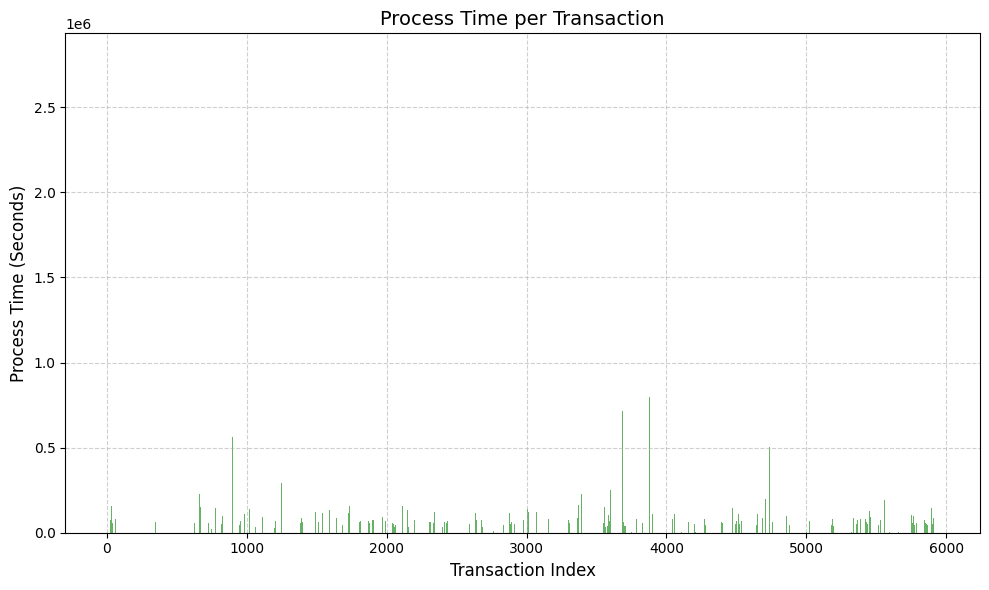

In [61]:
import matplotlib.pyplot as plt

# Plot the process times
def plot_process_times(df, process_time_column):
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df[process_time_column], color='green', alpha=0.6)
    
    # Add labels and title
    plt.xlabel('Transaction Index', fontsize=12)
    plt.ylabel('Process Time (Seconds)', fontsize=12)
    plt.title('Process Time per Transaction', fontsize=14)
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show plot
    plt.tight_layout()
    plt.show()


# Example usage of the plotting function
plot_process_times(labelled_transaction_df, 'process_time')


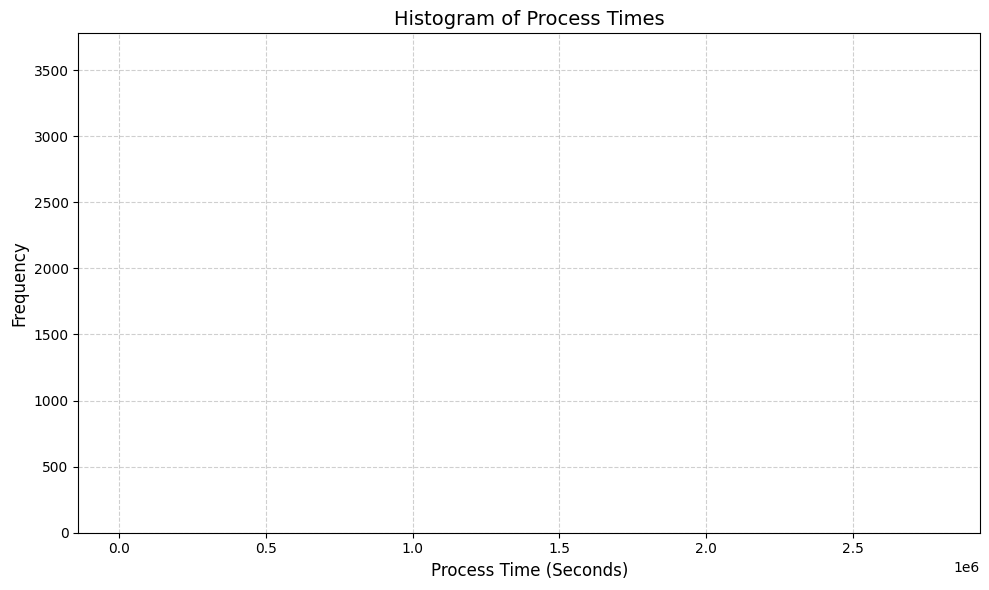

In [62]:

# Function to plot process times with bins (histogram)
def plot_process_time_histogram(df, process_time_column):
    plt.figure(figsize=(10, 6))
    
    # Plot a histogram with automatic binning
    plt.hist(df[process_time_column], bins='auto', color='purple', alpha=0.7)
    
    # Add labels and title
    plt.xlabel('Process Time (Seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Histogram of Process Times', fontsize=14)
    
    # Show grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame and 'process_time' is the column with process times
plot_process_time_histogram(labelled_transaction_df, 'process_time')


In [63]:
labelled_transaction_df.columns

Index(['id', 'reference_transaction_id', 'user_id', 'state', 'type',
       'category_id', 'amount', 'currency', 'direction', 'completed_at',
       'created_at', 'process_time'],
      dtype='object')

In [65]:
labelled_user_info_df.columns

Index(['user_id', 'session_id', 'country_of_residence', 'has_biometrics',
       'phone_number_country_code', 'reason_to_use_app', 'occupation',
       'kyc_state', 'gender', 'date_of_birth', 'document_issuing_country',
       'locale', 'screening_state', 'is_adverse_media_minor', 'is_pep',
       'user_current_state'],
      dtype='object')

In [68]:
labelled_user_list = cleaned_user_info_df.user_id.to_list()
unlabelled_user_list = unlabelled_user_info_df.user_id.to_list()

In [69]:
# Intersection of two lists using set
intersection = list(set(labelled_user_list) & set(unlabelled_user_list))

print("Intersection:", intersection)

Intersection: []


In [75]:
labelled_trans_list = labelled_transaction_df.id.to_list()
unlabelled_trans_list = unlabelled_transaction_df.id.to_list()
labelled_trans_list2 = labelled_transaction_df.reference_transaction_id.to_list()
unlabelled_trans_list2 = unlabelled_transaction_df.reference_transaction_id.to_list()

In [74]:
# Intersection of two lists using set
intersection2 = list(set(labelled_trans_list) & set(unlabelled_trans_list))

print("Intersection:", len(intersection2))

Intersection: 1562


In [76]:
# Intersection of two lists using set
intersection3 = list(set(labelled_trans_list2) & set(unlabelled_trans_list2))

print("Intersection:", len(intersection3))

Intersection: 1562


In [79]:
# Elements in list1 but not in list2
difference1 = list(set(unlabelled_trans_list) - set(labelled_trans_list))

print("Elements in list2 but not in list1:", len(difference1))

Elements in list2 but not in list1: 5190


In [80]:
# Elements in list1 but not in list2
difference1 = list(set(unlabelled_trans_list2) - set(labelled_trans_list2))

print("Elements in list2 but not in list1:", len(difference1))

Elements in list2 but not in list1: 5189


In [82]:
unlabelled_transaction_df.shape

(9849, 10)